# Ex.03: Mean sea surface temperature near the Cape Palos

The third example is devoted to the analysis of monthly mean sea surface temperature at 38º N, 0º (a location next to Cape Palos, Mediterranean Sea) that covers the period 01/15/1854 - 05/15/2021 (Source: [NOAA](https://www.ncei.noaa.gov). The analysis was conducted to reproduce large scale oscillations as in the case of sunspots (Example 02). The steps will be the following: 

1. Load marinetools packages
2. Read the input data and create the dictionary to fit the non-stationary probability model (PM)
3. Call marinetools.temporal.analysis.marginalfit for fitting the parameters of the PM

## 1. Load marinetools packages

The following code load the basic functions (read data, analysis and plots) included in marinetools

In [7]:
from marinetools.utils import read
from marinetools.temporal import analysis
from marinetools.graphics import plots

## 2. Read the input data and create the dictionary to make the marginal fit

In this example, data in a netcdf format is read it. The following code read the file of monthly water temperature. The "sst" key from netcdf file is transform to "T". As usually, some noise is included:

In [8]:
import pandas as pd

data = read.netcdf("data/mediterraneo", "sst")
data = analysis.nanoise(data, "sst")

Once the data is read, it is needed to create the dictionary with the properties about the temporal expansion of parameters and the probability models. In this example, a single Guassian function was selected. As the previous example, longer basis period will be selected. As it is observed, we choose a basis period of 20 years. A trigonometric temporal expansion and 40 terms are choosen to include the seasonal behaviour. Note that the in this example, it is created a dictionary inside of params with the key "T" where all the input parameters are included. This information is translated to the dictionary as follow.

In [9]:
params = {
    "sst": {
        "var": "sst",
        "non_stat_analysis": True,
        "basis_function": {"method": "trigonometric", "no_terms": 40},
        "fun": {0: "norm"},
        "basis_period": [20],
    }
}

## 3. Make the marginal fit
The following code will fit the parameters to the data.

In [10]:
analysis.marginalfit(data, params["sst"])

2022-01-21 12:10:20.901 | INFO     | marinetools.temporal.analysis:marginalfit:121 - 
 Initializing MarineTools.temporal, v.1.0.0
Copyright (C) 2021 Environmental Fluid Dynamics Group (University of Granada)
This program is free software; you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation; either version 3 of the License, or (at your option) any later 
version.
This program is distributed in the hope that it will be useful, but WITHOUT 
ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program; if not, write to the Free Software Foundation, Inc., 675 Mass
Ave, Cambridge, MA 02139, USA.
2022-01-21 12:10:20.901 | INFO     | marinetools.temporal.analysis:marginalfit:122 - Current Time = 12:10:20

2022-01-21 12:10:20.904

{'var': 'sst',
 'non_stat_analysis': True,
 'basis_function': {'method': 'trigonometric',
  'no_terms': 40,
  'periods': [1.0,
   0.5,
   0.3333333333333333,
   0.25,
   0.2,
   0.16666666666666666,
   0.14285714285714285,
   0.125,
   0.1111111111111111,
   0.1,
   0.09090909090909091,
   0.08333333333333333,
   0.07692307692307693,
   0.07142857142857142,
   0.06666666666666667,
   0.0625,
   0.058823529411764705,
   0.05555555555555555,
   0.05263157894736842,
   0.05,
   0.047619047619047616,
   0.045454545454545456,
   0.043478260869565216,
   0.041666666666666664,
   0.04,
   0.038461538461538464,
   0.037037037037037035,
   0.03571428571428571,
   0.034482758620689655,
   0.03333333333333333,
   0.03225806451612903,
   0.03125,
   0.030303030303030304,
   0.029411764705882353,
   0.02857142857142857,
   0.027777777777777776,
   0.02702702702702703,
   0.02631578947368421,
   0.02564102564102564,
   0.025],
  'order': 40},
 'fun': {0: 'norm'},
 'basis_period': [20],
 'no_param': 

The result will be saved at the file ""marginalfit/T_norm_nonst_20_trigonometric_40_SLSQP.json" in the folder "marginalfit". Read carefully the information that the tool gives in the shell to understand that the parameters are passed correctly. You can also read the json file with any text editor and follows the results as in the previous dictionary.

## 4. Verificate the marginal fit

The non-stationary empirical and theoretical cumulative distribution functions are plotted. The following code shows some more options to modify the windows scale, that differs from the previous example while it is monthly timeseries.

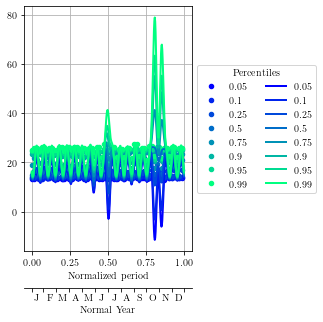

<AxesSubplot:xlabel='Normalized period'>

In [11]:
params = read.rjson("marginalfit/sst_norm_nonst_20_trigonometric_40_SLSQP")
plots.nonstationary_cdf(
    data, "sst", params, daysWindowsLength=120, equal_windows=True, date_axis=True
)